In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
comp_marks = pd.read_csv('comp_marks.csv')
comp_portrait = pd.read_csv('comp_portrait.csv')
comp_students = pd.read_csv('comp_students.csv')

# 1. Подбор параметров из comp_marks.csv

In [3]:
comp_marks.head()

,ISU,ST_YEAR,SEMESTER,TYPE_NAME,MARK,MAIN_PLAN,DISC_ID,PRED_ID
0,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,10502311854018326223,5087927234000983963
1,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,1601392918367593206,5087927234000983963
2,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,9559803959325174929,5087927234000983963
3,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,8955667882044263414,5087927234000983963
4,17623928044460629977,2020,1,Экзамен,3,4664712865904477750,17741967398854095262,5087927234000983963


In [4]:
comp_marks['MARK'].unique()

array(['зачет', '3', '4', 'незач', '5', '2', 'осв', nan, 'неявка'],
      dtype=object)

In [5]:
comp_marks_2 = comp_marks

comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '5', int(5), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '4', int(4), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '3', int(3), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '2', int(2), comp_marks_2.MARK)

comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'зачет', int(5), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'осв', int(5), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'незач', int(2), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'неявка', int(2), comp_marks_2.MARK)

comp_marks_2['MARK'] = comp_marks['MARK'].fillna(comp_marks['MARK'].median())

In [6]:
comp_marks_2['MARK'].unique()

array([5., 3., 4., 2.])

In [7]:
avg_mark = comp_marks_2.pivot_table(index = 'ISU', values = ['MARK'])
avg_mark = avg_mark.rename (columns= {'MARK': 'AVG_MARK'})

avg_mark.head()

,AVG_MARK
ISU,
999504425170639,4.698413
16243099018784918,4.035088
22160896830459167,4.650000
23604312120912668,3.117647
33612688142435218,4.655738


In [8]:
avg_mark_disc = comp_marks_2.pivot_table(index = 'DISC_ID', values = ['MARK'])
avg_mark_disc = avg_mark_disc.rename (columns= {'MARK': 'AVG_MARK_DISC'})

avg_mark_disc.head()

,AVG_MARK_DISC
DISC_ID,
10928733136090636,5.000000
57659945070201404,4.000000
81203412138540191,3.814815
119954623639665579,4.467005
150957394596913708,4.857143


# 2. Подбор параметров из comp_portrait.csv

In [9]:
comp_portrait.head()

,ISU,GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID
0,8746993777733478780,Ж,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,88.0,91.0,81.0,ЕГЭ,4877310761925081124
1,18279003839105282485,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,84.0,89.0,96.0,ЕГЭ,4877310761925081124
2,17601399077733331421,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,66.0,78.0,93.0,ЕГЭ,4877310761925081124
3,4111128904589594590,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,100.0,89.0,80.0,ЕГЭ,4877310761925081124
4,5943608672516320930,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,84.0,86.0,91.0,ЕГЭ,4877310761925081124


In [10]:
comp_portrait_res = comp_portrait[['ISU', 'GENDER', 'EXAM_TYPE']]
comp_portrait_res.head()

,ISU,GENDER,EXAM_TYPE
0,8746993777733478780,Ж,ЕГЭ
1,18279003839105282485,М,ВИ
2,17601399077733331421,М,ВИ
3,4111128904589594590,М,ВИ
4,5943608672516320930,М,ВИ


# 3. Подбор параметров из comp_students.csv

In [11]:
comp_students.head()

,ISU,KURS,DATE_START,DATE_END,PRIZNAK,MAIN_PLAN
0,4111128904589594590,2,2017-09-01,2018-08-31 00:00:00,обучен,1888061104212561891
1,4111128904589594590,3,2018-09-01,2018-11-02 00:00:00,обучен,1888061104212561891
2,4111128904589594590,3,2018-11-03,2019-08-31 00:00:00,обучен,1888061104212561891
3,4111128904589594590,4,2019-09-01,2020-07-06 00:00:00,обучен,1888061104212561891
4,5943608672516320930,2,2017-09-01,2018-08-31 00:00:00,обучен,2318124975100570268


In [12]:
comp_students['PRIZNAK'].unique()

array(['обучен', 'отчисл', 'академ', nan], dtype=object)

In [13]:
comp_students_2 = comp_students

comp_students_2['PRIZNAK'] = np.where(comp_students_2.PRIZNAK == 'обучен', int(1), comp_students_2.PRIZNAK)
comp_students_2['PRIZNAK'] = np.where(comp_students_2.PRIZNAK == 'отчисл', int(0), comp_students_2.PRIZNAK)
comp_students_2['PRIZNAK'] = np.where(comp_students_2.PRIZNAK == 'академ', int(0), comp_students_2.PRIZNAK)

comp_students_2.head()

,ISU,KURS,DATE_START,DATE_END,PRIZNAK,MAIN_PLAN
0,4111128904589594590,2,2017-09-01,2018-08-31 00:00:00,1,1888061104212561891
1,4111128904589594590,3,2018-09-01,2018-11-02 00:00:00,1,1888061104212561891
2,4111128904589594590,3,2018-11-03,2019-08-31 00:00:00,1,1888061104212561891
3,4111128904589594590,4,2019-09-01,2020-07-06 00:00:00,1,1888061104212561891
4,5943608672516320930,2,2017-09-01,2018-08-31 00:00:00,1,2318124975100570268


In [14]:
priznak = comp_students_2.pivot_table(index = 'ISU', values = ['PRIZNAK'])

priznak.head()

,PRIZNAK
ISU,
999504425170639,1.00
7048242597236404,1.00
13739999946233224,1.00
16243099018784918,0.75
22160896830459167,1.00


In [15]:
priznak_kurs = comp_students_2.pivot_table(index = 'KURS', values = ['PRIZNAK'])
priznak_kurs = priznak_kurs.rename (columns= {'PRIZNAK': 'PRIZNAK_KURS'})

priznak_kurs.head()

,PRIZNAK_KURS
KURS,
1,0.945161
2,0.937471
3,0.941021
4,0.865606


# 4. Подготовка train/test

In [16]:
train.head()

,ISU,ST_YEAR,SEMESTER,DISC_ID,TYPE_NAME,DEBT
0,17623928044460629977,2020,1,10502311854018326223,Зачет,0
1,17623928044460629977,2020,1,1601392918367593206,Зачет,0
2,17623928044460629977,2020,1,9559803959325174929,Зачет,0
3,17623928044460629977,2020,1,8955667882044263414,Зачет,0
4,17623928044460629977,2020,1,17741967398854095262,Экзамен,0


In [17]:
#добавление в train параметров из comp_marks.csv
train_2 = train.merge(avg_mark, on=['ISU'], how='inner').merge(avg_mark_disc, on=['DISC_ID'], how='inner')

#добавление в train параметров из comp_portrait.csv
train_2 = train_2.merge(comp_portrait_res, on=['ISU'], how='inner')

#добавление в train параметров из comp_students.csv
train_2['KURS'] = train_2['SEMESTER']/2+0.1
train_2.KURS = train_2.KURS.round(0)
train_2 = train_2.merge(priznak, on=['ISU'], how='inner').merge(priznak_kurs, on=['KURS'], how='inner')

#перенос 'DEBT' в последний столбец таблицы
train_2 = train_2.rename (columns= {'DEBT': 'DEBT_DROP'})
train_2['DEBT'] = train_2['DEBT_DROP']

#удаление столбцов
train_2 = train_2.drop(columns = ['ST_YEAR', 'KURS', 'DEBT_DROP'])

train_2.head()

,ISU,SEMESTER,DISC_ID,TYPE_NAME,AVG_MARK,AVG_MARK_DISC,GENDER,EXAM_TYPE,PRIZNAK,PRIZNAK_KURS,DEBT
0,17623928044460629977,1,10502311854018326223,Зачет,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
1,17623928044460629977,2,10502311854018326223,Зачет,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
2,17623928044460629977,1,10502311854018326223,Зачет,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
3,17623928044460629977,2,10502311854018326223,Зачет,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
4,17623928044460629977,1,1601392918367593206,Зачет,4.0,4.858446,М,ЕГЭ,0.666667,0.945161,0


In [18]:
#добавление в test параметров из comp_marks.csv
test_2 = test.merge(avg_mark, on=['ISU'], how='left').merge(avg_mark_disc, on=['DISC_ID'], how='left')

#добавление в test параметров из comp_portrait.csv
test_2 = test_2.merge(comp_portrait_res, on=['ISU'], how='left')

#добавление в test параметров из comp_students.csv
test_2['KURS'] = test_2['SEMESTER']/2+0.1
test_2.KURS = test_2.KURS.round(0)
test_2 = test_2.merge(priznak, on=['ISU'], how='left').merge(priznak_kurs, on=['KURS'], how='left')

#заполнение отсутствующих данных
test_2['AVG_MARK'] = test_2['AVG_MARK'].fillna(avg_mark['AVG_MARK'].median())
test_2['AVG_MARK_DISC'] = test_2['AVG_MARK_DISC'].fillna(avg_mark_disc['AVG_MARK_DISC'].median())
test_2['PRIZNAK'] = test_2['PRIZNAK'].fillna(priznak['PRIZNAK'].mean())

#удаление столбцов
test_2 = test_2.drop(columns = ['ST_YEAR', 'KURS'])

test_2.head()

,ISU,SEMESTER,DISC_ID,TYPE_NAME,AVG_MARK,AVG_MARK_DISC,GENDER,EXAM_TYPE,PRIZNAK,PRIZNAK_KURS
0,22160896830459167,3,552619236026332123,Экзамен,4.65,3.726659,М,ЕГЭ,1.0,0.937471
1,22160896830459167,3,5702509582319458883,Зачет,4.65,4.858387,М,ЕГЭ,1.0,0.937471
2,22160896830459167,3,7735626259430674628,Зачет,4.65,4.983287,М,ЕГЭ,1.0,0.937471
3,22160896830459167,3,8955667882044263414,Зачет,4.65,4.824812,М,ЕГЭ,1.0,0.937471
4,22160896830459167,3,9075687484357010791,Зачет,4.65,5.000000,М,ЕГЭ,1.0,0.937471


## 4.1 Разведочный анализ

<AxesSubplot:xlabel='AVG_MARK'>

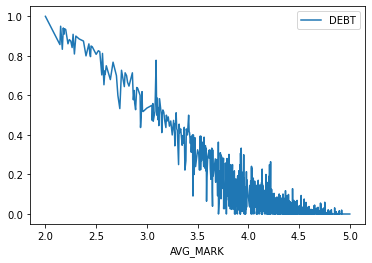

In [19]:
#задача - оценить, влияет ли показатель 'AVG_MARK' на вероятность того, что у студента возникнет академическая задолженность
int_avg_mark = train_2.groupby('AVG_MARK').mean()
int_avg_mark.plot(y = "DEBT")

In [20]:
#вывод - да, влияет; чем больше 'AVG_MARK', тем меньше вероятность возникновения задолженности

<AxesSubplot:xlabel='AVG_MARK_DISC'>

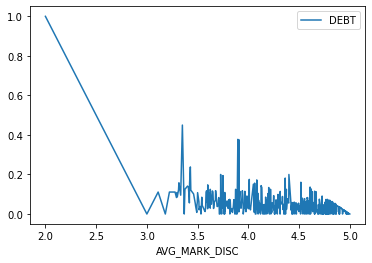

In [21]:
#аналогично оценим показатель 'AVG_MARK_DISC'
int_avg_mark_disc = train_2.groupby('AVG_MARK_DISC').mean()
int_avg_mark_disc.plot(y = "DEBT")

In [22]:
#чем меньше 'AVG_MARK_DISC', тем выше скачки вверх, 
#это значит, что вероятность возникновения задолженности будет больше

<AxesSubplot:xlabel='PRIZNAK'>

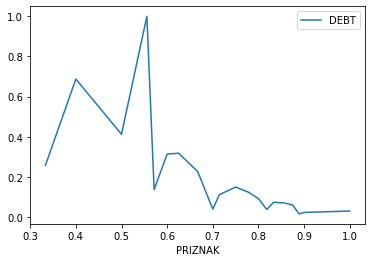

In [23]:
int_priznak = train_2.groupby('PRIZNAK').mean()
int_priznak.plot(y = "DEBT")

In [24]:
#чем больше 'PRIZNAK', тем меньше вероятность возникновения задолженности

<AxesSubplot:xlabel='TYPE_NAME'>

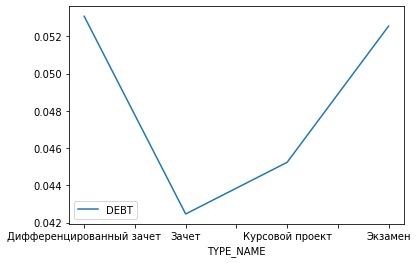

In [25]:
int_type_name = train_2.groupby('TYPE_NAME').mean()
int_type_name.plot(y = "DEBT")

In [26]:
#самая низкая вероятность возникновения задолженности - на зачете, самая высокая - на диф. зачете и на экзамене

<AxesSubplot:xlabel='SEMESTER'>

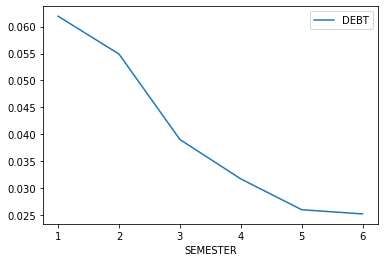

In [27]:
int_semester = train_2.groupby('SEMESTER').mean()
int_semester.plot(y = "DEBT")

In [28]:
#вероятность возникновения задолженности падает с каждым последующим семестром

In [29]:
#Вывод: показатели 'AVG_MARK', 'AVG_MARK_DISC', 'PRIZNAK','TYPE_NAME' и 'SEMESTER' влияют на таргет 
#и их можно использовать при обучении модели

## 4.2 one-hot-encoding

In [30]:
def encode_categorical(df_train, df_test):
    
    test_start_ind = df_train.index[-1]
    concated_df = pd.concat([df_train, df_test], sort=False) 
    encoded_df = pd.get_dummies(concated_df, drop_first=True) 
    df_train_encoded, df_test_encoded = encoded_df.iloc[:test_start_ind+1, :], encoded_df.iloc[test_start_ind+1:, :] 
    
    return df_train_encoded, df_test_encoded

In [31]:
X_train, X_test = encode_categorical(train_2.drop(columns = ['DEBT']), test_2)
y_train = train_2['DEBT']

X_test.head()

,ISU,SEMESTER,DISC_ID,AVG_MARK,AVG_MARK_DISC,PRIZNAK,PRIZNAK_KURS,TYPE_NAME_Зачет,TYPE_NAME_Курсовой проект,TYPE_NAME_Экзамен,GENDER_М,EXAM_TYPE_ЕГЭ,EXAM_TYPE_ОЛИМПИАДА
0,22160896830459167,3,552619236026332123,4.65,3.726659,1.0,0.937471,0,0,1,1,1,0
1,22160896830459167,3,5702509582319458883,4.65,4.858387,1.0,0.937471,1,0,0,1,1,0
2,22160896830459167,3,7735626259430674628,4.65,4.983287,1.0,0.937471,1,0,0,1,1,0
3,22160896830459167,3,8955667882044263414,4.65,4.824812,1.0,0.937471,1,0,0,1,1,0
4,22160896830459167,3,9075687484357010791,4.65,5.000000,1.0,0.937471,1,0,0,1,1,0


## 4.2 train_test_split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
y = train_2['DEBT']
X = X_train

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.85)

# 5. Выбор модели

## 5.1 DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_clf = DecisionTreeClassifier()

In [37]:
dt_clf.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [38]:
from sklearn import tree

text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_3 <= 3.53
|   |--- feature_3 <= 2.71
|   |   |--- feature_3 <= 2.16
|   |   |   |--- feature_3 <= 2.03
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  2.03
|   |   |   |   |--- feature_2 <= 16353527371854249984.00
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_3 <= 2.12
|   |   |   |   |   |   |   |--- feature_4 <= 4.39
|   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 2.07
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 7050753965360676864.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  7050753965360676864.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_3 >  2.07
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   | 

In [39]:
dt_clf_pred = dt_clf.predict(X_test1)

## 5.2 RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rndf_clf = RandomForestClassifier(n_estimators = 100)

In [42]:
%%time

rndf_clf.fit(X_train1, y_train1)

Wall time: 17.9 s


RandomForestClassifier()

In [43]:
rndf_pred = rndf_clf.predict(X_test1) #предсказание результата

## 5.3 CatBoost

In [44]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [45]:
cat.fit(X_train1, y_train1)

Learning rate set to 0.08725
0:	learn: 0.5145197	total: 167ms	remaining: 2m 46s
1:	learn: 0.3958726	total: 193ms	remaining: 1m 36s
2:	learn: 0.3182872	total: 216ms	remaining: 1m 11s
3:	learn: 0.2650024	total: 238ms	remaining: 59.2s
4:	learn: 0.2195502	total: 259ms	remaining: 51.6s
5:	learn: 0.1905699	total: 281ms	remaining: 46.5s
6:	learn: 0.1657388	total: 303ms	remaining: 42.9s
7:	learn: 0.1517939	total: 323ms	remaining: 40.1s
8:	learn: 0.1398513	total: 343ms	remaining: 37.7s
9:	learn: 0.1293829	total: 365ms	remaining: 36.2s
10:	learn: 0.1223841	total: 386ms	remaining: 34.7s
11:	learn: 0.1170048	total: 412ms	remaining: 33.9s
12:	learn: 0.1105384	total: 434ms	remaining: 32.9s
13:	learn: 0.1073231	total: 456ms	remaining: 32.1s
14:	learn: 0.1039983	total: 476ms	remaining: 31.3s
15:	learn: 0.1008241	total: 500ms	remaining: 30.7s
16:	learn: 0.0995464	total: 521ms	remaining: 30.1s
17:	learn: 0.0976678	total: 542ms	remaining: 29.6s
18:	learn: 0.0964936	total: 563ms	remaining: 29s
19:	learn: 

163:	learn: 0.0732380	total: 3.6s	remaining: 18.4s
164:	learn: 0.0732065	total: 3.64s	remaining: 18.4s
165:	learn: 0.0731643	total: 3.66s	remaining: 18.4s
166:	learn: 0.0731258	total: 3.68s	remaining: 18.4s
167:	learn: 0.0730867	total: 3.7s	remaining: 18.3s
168:	learn: 0.0730459	total: 3.72s	remaining: 18.3s
169:	learn: 0.0729596	total: 3.74s	remaining: 18.3s
170:	learn: 0.0729269	total: 3.76s	remaining: 18.2s
171:	learn: 0.0728963	total: 3.78s	remaining: 18.2s
172:	learn: 0.0728611	total: 3.8s	remaining: 18.2s
173:	learn: 0.0728250	total: 3.82s	remaining: 18.1s
174:	learn: 0.0728011	total: 3.84s	remaining: 18.1s
175:	learn: 0.0727324	total: 3.86s	remaining: 18.1s
176:	learn: 0.0727131	total: 3.88s	remaining: 18.1s
177:	learn: 0.0726831	total: 3.9s	remaining: 18s
178:	learn: 0.0726341	total: 3.92s	remaining: 18s
179:	learn: 0.0725770	total: 3.94s	remaining: 18s
180:	learn: 0.0725461	total: 3.96s	remaining: 17.9s
181:	learn: 0.0725199	total: 3.98s	remaining: 17.9s
182:	learn: 0.0724573	

325:	learn: 0.0675120	total: 7.23s	remaining: 15s
326:	learn: 0.0674710	total: 7.26s	remaining: 14.9s
327:	learn: 0.0674359	total: 7.28s	remaining: 14.9s
328:	learn: 0.0674059	total: 7.31s	remaining: 14.9s
329:	learn: 0.0673814	total: 7.33s	remaining: 14.9s
330:	learn: 0.0673540	total: 7.35s	remaining: 14.9s
331:	learn: 0.0673103	total: 7.37s	remaining: 14.8s
332:	learn: 0.0672877	total: 7.39s	remaining: 14.8s
333:	learn: 0.0672620	total: 7.41s	remaining: 14.8s
334:	learn: 0.0672399	total: 7.44s	remaining: 14.8s
335:	learn: 0.0672097	total: 7.46s	remaining: 14.7s
336:	learn: 0.0671854	total: 7.48s	remaining: 14.7s
337:	learn: 0.0671726	total: 7.51s	remaining: 14.7s
338:	learn: 0.0671165	total: 7.53s	remaining: 14.7s
339:	learn: 0.0670918	total: 7.56s	remaining: 14.7s
340:	learn: 0.0670514	total: 7.58s	remaining: 14.6s
341:	learn: 0.0670348	total: 7.6s	remaining: 14.6s
342:	learn: 0.0669791	total: 7.62s	remaining: 14.6s
343:	learn: 0.0669597	total: 7.64s	remaining: 14.6s
344:	learn: 0.0

490:	learn: 0.0630572	total: 11.1s	remaining: 11.5s
491:	learn: 0.0630290	total: 11.1s	remaining: 11.5s
492:	learn: 0.0629986	total: 11.2s	remaining: 11.5s
493:	learn: 0.0629638	total: 11.2s	remaining: 11.4s
494:	learn: 0.0629436	total: 11.2s	remaining: 11.4s
495:	learn: 0.0628934	total: 11.2s	remaining: 11.4s
496:	learn: 0.0628632	total: 11.3s	remaining: 11.4s
497:	learn: 0.0628434	total: 11.3s	remaining: 11.4s
498:	learn: 0.0628089	total: 11.3s	remaining: 11.3s
499:	learn: 0.0627791	total: 11.3s	remaining: 11.3s
500:	learn: 0.0627516	total: 11.3s	remaining: 11.3s
501:	learn: 0.0627128	total: 11.4s	remaining: 11.3s
502:	learn: 0.0626666	total: 11.4s	remaining: 11.3s
503:	learn: 0.0626524	total: 11.4s	remaining: 11.2s
504:	learn: 0.0626366	total: 11.4s	remaining: 11.2s
505:	learn: 0.0626253	total: 11.5s	remaining: 11.2s
506:	learn: 0.0626034	total: 11.5s	remaining: 11.2s
507:	learn: 0.0625852	total: 11.5s	remaining: 11.2s
508:	learn: 0.0625675	total: 11.5s	remaining: 11.1s
509:	learn: 

649:	learn: 0.0596448	total: 14.7s	remaining: 7.92s
650:	learn: 0.0596315	total: 14.7s	remaining: 7.9s
651:	learn: 0.0596127	total: 14.8s	remaining: 7.88s
652:	learn: 0.0595942	total: 14.8s	remaining: 7.86s
653:	learn: 0.0595772	total: 14.8s	remaining: 7.84s
654:	learn: 0.0595689	total: 14.8s	remaining: 7.82s
655:	learn: 0.0595494	total: 14.9s	remaining: 7.79s
656:	learn: 0.0595419	total: 14.9s	remaining: 7.77s
657:	learn: 0.0595218	total: 14.9s	remaining: 7.75s
658:	learn: 0.0595063	total: 14.9s	remaining: 7.73s
659:	learn: 0.0594850	total: 15s	remaining: 7.71s
660:	learn: 0.0594681	total: 15s	remaining: 7.69s
661:	learn: 0.0594513	total: 15s	remaining: 7.66s
662:	learn: 0.0594261	total: 15s	remaining: 7.64s
663:	learn: 0.0593933	total: 15.1s	remaining: 7.62s
664:	learn: 0.0593755	total: 15.1s	remaining: 7.59s
665:	learn: 0.0593541	total: 15.1s	remaining: 7.57s
666:	learn: 0.0593098	total: 15.1s	remaining: 7.55s
667:	learn: 0.0592875	total: 15.1s	remaining: 7.53s
668:	learn: 0.0592763

816:	learn: 0.0565841	total: 18.6s	remaining: 4.17s
817:	learn: 0.0565666	total: 18.6s	remaining: 4.14s
818:	learn: 0.0565563	total: 18.6s	remaining: 4.12s
819:	learn: 0.0565479	total: 18.7s	remaining: 4.1s
820:	learn: 0.0565201	total: 18.7s	remaining: 4.07s
821:	learn: 0.0564954	total: 18.7s	remaining: 4.05s
822:	learn: 0.0564826	total: 18.7s	remaining: 4.03s
823:	learn: 0.0564466	total: 18.8s	remaining: 4.01s
824:	learn: 0.0564336	total: 18.8s	remaining: 3.98s
825:	learn: 0.0564206	total: 18.8s	remaining: 3.96s
826:	learn: 0.0564112	total: 18.8s	remaining: 3.94s
827:	learn: 0.0563941	total: 18.8s	remaining: 3.92s
828:	learn: 0.0563766	total: 18.9s	remaining: 3.89s
829:	learn: 0.0563630	total: 18.9s	remaining: 3.87s
830:	learn: 0.0563535	total: 18.9s	remaining: 3.85s
831:	learn: 0.0563345	total: 18.9s	remaining: 3.82s
832:	learn: 0.0563274	total: 19s	remaining: 3.8s
833:	learn: 0.0563116	total: 19s	remaining: 3.78s
834:	learn: 0.0562963	total: 19s	remaining: 3.75s
835:	learn: 0.056288

975:	learn: 0.0541721	total: 22s	remaining: 542ms
976:	learn: 0.0541519	total: 22.1s	remaining: 519ms
977:	learn: 0.0541401	total: 22.1s	remaining: 497ms
978:	learn: 0.0541226	total: 22.1s	remaining: 474ms
979:	learn: 0.0541135	total: 22.1s	remaining: 452ms
980:	learn: 0.0540968	total: 22.1s	remaining: 429ms
981:	learn: 0.0540782	total: 22.2s	remaining: 406ms
982:	learn: 0.0540637	total: 22.2s	remaining: 384ms
983:	learn: 0.0540495	total: 22.2s	remaining: 361ms
984:	learn: 0.0540353	total: 22.2s	remaining: 339ms
985:	learn: 0.0540213	total: 22.3s	remaining: 316ms
986:	learn: 0.0540072	total: 22.3s	remaining: 293ms
987:	learn: 0.0539980	total: 22.3s	remaining: 271ms
988:	learn: 0.0539730	total: 22.3s	remaining: 248ms
989:	learn: 0.0539622	total: 22.3s	remaining: 226ms
990:	learn: 0.0539493	total: 22.4s	remaining: 203ms
991:	learn: 0.0539276	total: 22.4s	remaining: 180ms
992:	learn: 0.0539199	total: 22.4s	remaining: 158ms
993:	learn: 0.0539070	total: 22.4s	remaining: 135ms
994:	learn: 0.

In [46]:
cat_pred = cat.predict(X_test1) #предсказание результата

## 5.4 Сравнение моделей

In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
#DecisionTreeClassifier
matrix_dt_clf = confusion_matrix(y_test1, dt_clf_pred)
matrix_dt_clf

array([[24583,   462],
       [  452,   781]], dtype=int64)

In [49]:
#RandomForest
matrix_rndf = confusion_matrix(y_test1, rndf_pred)
matrix_rndf

array([[24866,   179],
       [  541,   692]], dtype=int64)

In [50]:
#CatBoost
matrix_cat = confusion_matrix(y_test1, cat_pred)
matrix_cat

array([[24901,   144],
       [  536,   697]], dtype=int64)

In [51]:
#Вывод: с задачей наилучшим образом справилось DecisionTree

# 6. Обучение выбранной модели

In [52]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
from sklearn import tree

text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_3 <= 3.48
|   |--- feature_3 <= 2.71
|   |   |--- feature_3 <= 2.21
|   |   |   |--- feature_3 <= 2.03
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  2.03
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_4 <= 4.84
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 2.09
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  2.09
|   |   |   |   |   |   |   |   |--- feature_3 <= 2.19
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  2.19
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 10370300928212336640.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 8991996307463733248.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|

In [54]:
dt_clf_pred_fin = dt_clf.predict(X_test) #предсказание результата

# 7. Оформление решения

In [55]:
sample_submission = test

In [56]:
sample_submission['ID'] = sample_submission[['ISU', 'ST_YEAR', 'DISC_ID', 'SEMESTER', 'TYPE_NAME']].apply(
        lambda x: f'ISU:{x[0]} | ST_YEAR:{x[1]} | DISC_ID:{x[2]} | SEMESTER:{x[3]} | TYPE_NAME:{x[4]}', axis =1)

In [57]:
sample_submission['DEBT'] = dt_clf_pred_fin

In [58]:
sample_submission_2 = sample_submission[['ID', 'DEBT']]

In [59]:
sample_submission_2.to_csv('sample_submission.csv', index=False)